In [1]:
from NMF import *
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
K = 4
F = 1025
N = 500
W = np.zeros((F, K))
H = np.zeros((K, N))

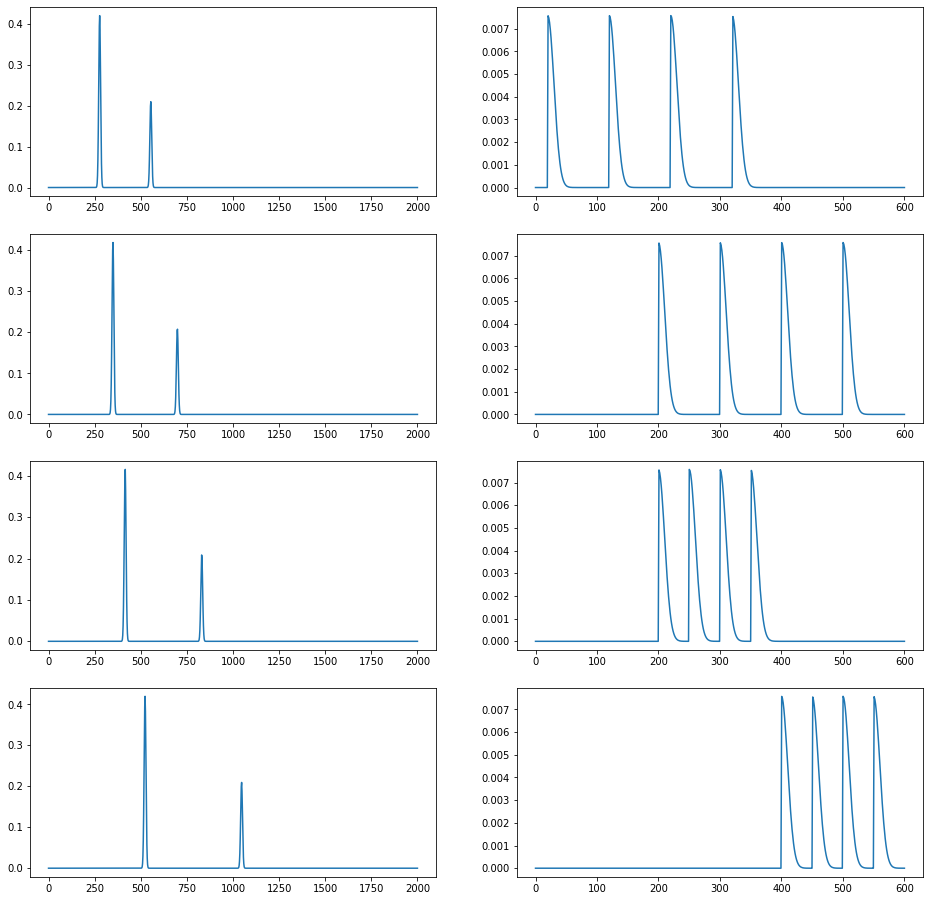

In [3]:
pitches = np.array([61, 65, 68, 72])
times_set = np.array([[20, 120, 220, 320],[200, 300, 400, 500],[200, 250, 300, 350],[400, 450, 500, 550]])
freq_set = 440 * np.power(2, (pitches - 69) / 12)

frequencies = np.linspace(0, 2000, F)
times = np.linspace(0, 600, N)

for i in range(4):
    W[:, i] = stats.norm.pdf(frequencies, loc=freq_set[i], scale=5) + 0.5 * stats.norm.pdf(frequencies, loc=2 * freq_set[i], scale=5)
    for j in range(4):
        H[i, :] += (times > times_set[i, j]) * stats.norm.pdf(times, loc=times_set[i, j], scale=10)
for k in range(K):
    norm_factor = np.linalg.norm(W[:, k])
    W[:, k] = W[:, k] / norm_factor
    H[k, :] = H[k, :] * norm_factor

fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W[:, i])
    axes[i, 1].plot(times, H[i, :])
plt.show()

In [4]:
V = W @ H
spec = Spectrogram(V, frequencies)

#### EM_IS_NMF

C:\Users\arthu\Desktop\EPFL\MA1\StatML\project\StatisticalMachineLearning\NMF.py:393: RuntimeWarning: invalid value encountered in log
  return x / (y+1e-09) - (np.log(x+1e-09) - np.log(y+1e-09)) - 1


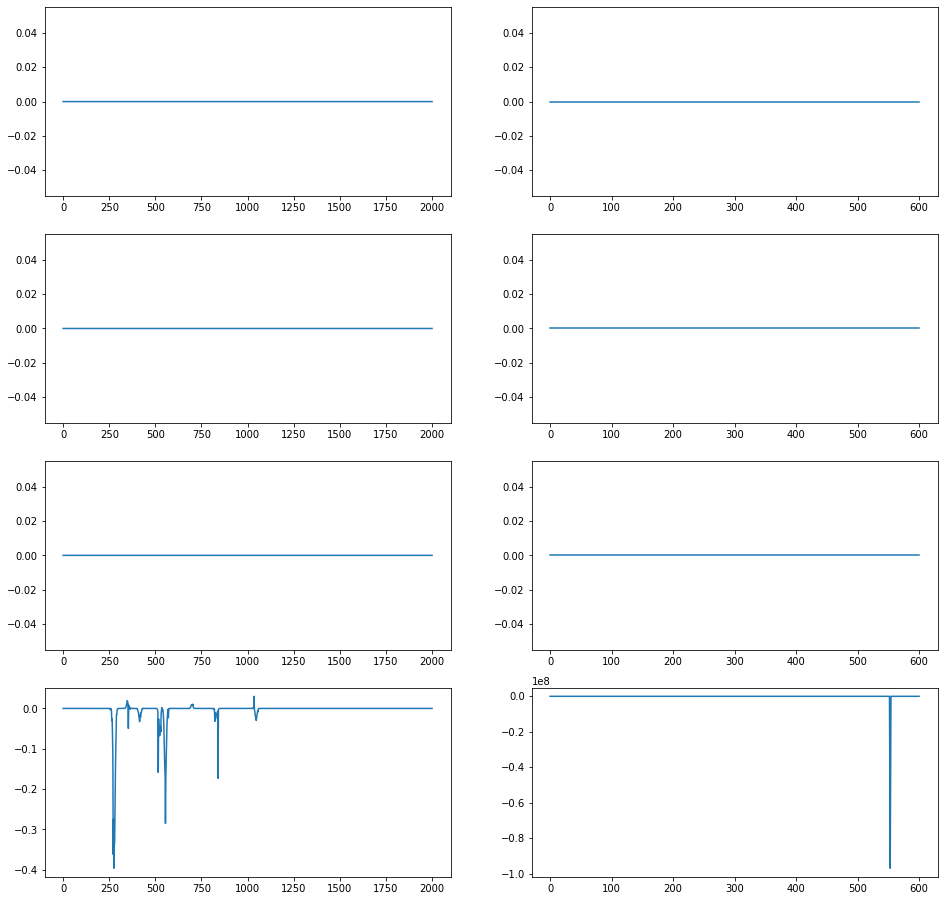

[20.6 20.6 20.6 61. ]


In [11]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_EM_IS(K, 5000) #5000
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])

In [12]:
print(W_)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.76546642e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.62964108e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.72688409e-07]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.88651331e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.46300324e-11]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.13205773e-09]]


In [13]:
print(H_)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.03503257e-07  1.42477638e-07  3.88518580e-08 ...  3.75892399e-07
  -2.68893267e-06  5.44695246e-06]]


In [14]:
print(matrix_to_factorize.costs)

[2531423429422850.0, 1393210709493308.5, 870978767305031.6, 577677579180230.9, 395750405519462.2, 276299223352057.12, 195118843811951.12, 138747695703384.92, 99072849087820.97, 70916446242027.48, 50834539210670.08, 36469478614400.12, 26176276514857.75, 18793480443740.418, 13495184625540.57, 9691626066409.31, 6960632032469.357, 4999563249411.188, 3591291102862.2446, 2579965899724.5283, 1853695251522.373, 1332135326247.8726, 957591117610.1411, 688629558140.8091, 495494501896.9419, 356814695490.0198, 257240008912.54572, 185744279342.08182, 134406908041.93707, 97538222984.48944, 71051571493.15637, 52012409879.29363, 38314332170.809, 28446157150.541367, 21324385369.920815, 16172639790.679432, 12434918153.485126, 9713203016.110464, 7722627920.216738, 6259295713.319934, 5177207898.206869, 4371746651.870163, 3767862086.895754, 3311632504.194288, 2964238754.5975585, 2697664060.263472, 2491625762.390023, 2331385939.315271, 2206188631.2981377, 2108143386.7773829, 2031427713.9296286, 1971714460.45

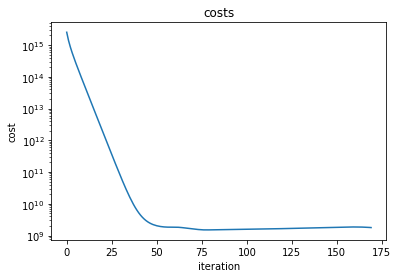

In [15]:
c = matrix_to_factorize.costs
fig = plt.figure()
ax = fig.add_subplot(111, title=r'costs')
ax.semilogy(range(len(c)), c)
ax.set_xlabel('iteration')
ax.set_ylabel('cost')
plt.show()

#### R_EM_IS_NMF

In [ ]:
K = 4
matrix_to_factorize = NMF(V)
W_, H_, WH_ = matrix_to_factorize.factorize_R_EM_IS(K, 5000, alpha=10)
fig, axes = plt.subplots(K, 2, figsize=(8 * 2, K * 4))
for i in range(K):
    axes[i, 0].plot(frequencies, W_[:, i])
    axes[i, 1].plot(times, H_[i, :])
plt.show()
print(get_pitches(W_, frequencies)[0])